In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
import umap
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

/Users/ellen-beatetysvaer/opt/anaconda3/envs/pthree-dev/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
features = pd.read_csv('../../data/222k_dinov2_features.csv')

#test = np.arange(1,4)
#[str(i) for i in test]

In [3]:
map = {"Unnamed: 0" : "species", "Unnamed: 1" : "filename"}

features = features.rename(columns=map)
numerical_features = features.iloc[:, 2:]

In [4]:
import umap
#n = 70
#pca = PCA(n_components = n)
standard = StandardScaler().fit_transform(numerical_features) 

#np.savetxt('../../data/222k_numerical_standardized_features.csv', standard, delimiter=",")
#standard.to_csv('../../data/222k_numerical_standardized_features.csv')
#pca_fit = pca.fit_transform(standard)

#umap
reducer = umap.UMAP(random_state=42) # fixed random state gives reproducibility
embedding = reducer.fit_transform(standard) 
print("finished embedding")

# putting all pca into pca df and umap df
#pca_df = pd.DataFrame(pca_fit, index = features.index, columns = ["pca_"+str(i) for i in range(n)])
umap_df = pd.DataFrame(embedding, index = features.index, columns = ["embedding_0", "embedding_1"])

#pca_df.to_csv('../../data/222k_pca_dino2_features.csv')
#umap_df.to_csv('../../data/222k_umap_dino2_features.csv')

multiindex_umap = umap_df

#plt.plot(np.cumsum(pca.explained_variance_ratio_), label = "Cumulative variance PCA")
#plt.axhline(0.85, ls = ":", label = "0.85 of variance explained")
#plt.grid(True)
#plt.xlabel("Number of Principal Components")
#plt.ylabel("Variance in data")
#plt.legend()
#plt.savefig("figs/cumsum_pca.pdf", bbox_inches = "tight")
#plt.show()

#print(np.cumsum(pca.explained_variance_ratio_))

/Users/ellen-beatetysvaer/opt/anaconda3/envs/pthree-dev/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


finished embedding


In [5]:
# steps above have already been performed: 
#pca_df = pd.read_csv('../../data/222k_pca_dino2_features.csv')
#umap_df = pd.read_csv("../../data/222k_umap_dino2_features.csv")

# pca_df


In [ ]:
#pca_df = pca_df.reset_index()
map = {"Unnamed: 0" : "species", "Unnamed: 1" : "filename"}
#pca_df = pca_df.rename(columns = map)


,species,filename,embedding_0,embedding_1
0,Metazoa,20230928_035045.356.0.txt,2.576015,3.866153
1,Metazoa,20231003_002219.353.0.txt,11.168422,2.442060
2,Metazoa,20230930_163933.623.0.txt,2.728848,3.683193
3,Metazoa,20230927_062802.266.0.txt,10.534199,4.750545
4,Metazoa,20230930_084236.390.1.txt,6.962713,2.189163
...,...,...,...,...
221978,Noctiluca,20230927_215600.334.0.txt,0.586932,6.481435
221979,Noctiluca,20230926_192131.225.0.txt,0.386384,5.455097
221980,Noctiluca,20230930_100034.003.0.txt,0.020903,5.946057
221981,Noctiluca,20230928_154748.204.0.txt,0.203967,5.396380


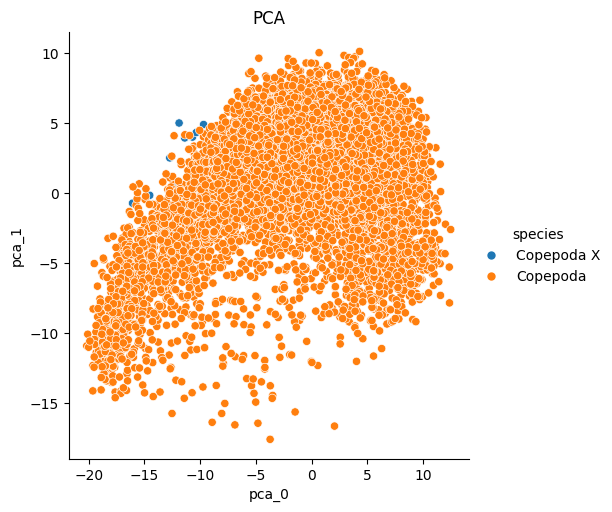

In [25]:
sns.relplot(x = "pca_0", y = "pca_1", 
            data = pca_df.query("species == ['Copepoda X', 'Copepoda']"), 
            kind = "scatter", 
            hue = "species"
            )
plt.title(f"PCA")
#plt.savefig("figs/pca0_pca1.pdf", bbox_inches = "tight")
plt.show()

In [7]:
umap_df = umap_df.rename(columns=map)
#set(umap_df['species'])
umap_df


,embedding_0,embedding_1
0,2.988302,3.669734
1,11.276031,2.833374
2,3.067230,3.553896
3,10.468347,5.114989
4,7.401993,2.688993
...,...,...
221978,0.290250,6.635883
221979,0.207976,5.578900
221980,-0.172029,6.036672
221981,0.050638,5.590748


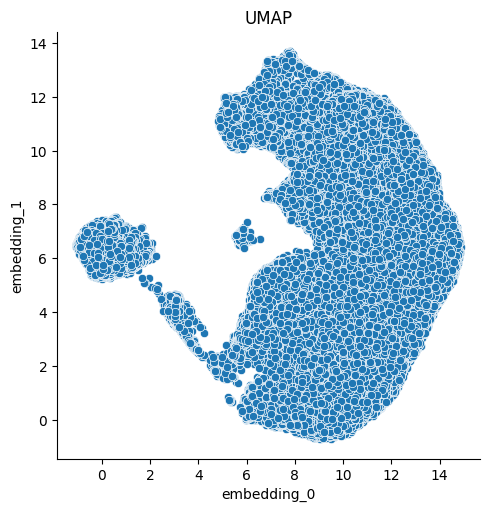

In [9]:
sns.relplot(x = "embedding_0", y = "embedding_1", 
            #data = umap_df.query("species != ['Copepoda X', 'Copepoda']"), 
            data = umap_df, #.query("species != ['artefact', 'detritus', 'not-living', 'other', 'temporary']"), 
            kind = "scatter", 
            #hue = "species"
            )
plt.title(f"UMAP")
#plt.savefig("figs/umap_on_70pca.pdf", bbox_inches = "tight")
plt.show()

In [16]:
umap_df = pd.read_csv("../../data/222k_umap_dino2_features.csv")

umap_df.rename(columns = map)

,species,filename,embedding_0,embedding_1
0,Metazoa,20230928_035045.356.0.txt,2.576015,3.866153
1,Metazoa,20231003_002219.353.0.txt,11.168422,2.442060
2,Metazoa,20230930_163933.623.0.txt,2.728848,3.683193
3,Metazoa,20230927_062802.266.0.txt,10.534199,4.750545
4,Metazoa,20230930_084236.390.1.txt,6.962713,2.189163
...,...,...,...,...
221978,Noctiluca,20230927_215600.334.0.txt,0.586932,6.481435
221979,Noctiluca,20230926_192131.225.0.txt,0.386384,5.455097
221980,Noctiluca,20230930_100034.003.0.txt,0.020903,5.946057
221981,Noctiluca,20230928_154748.204.0.txt,0.203967,5.396380


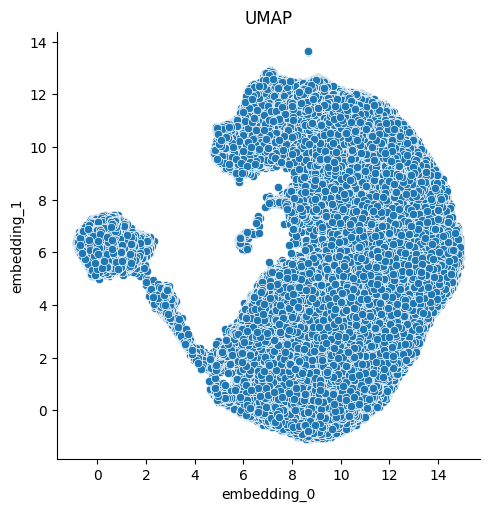

In [20]:

sns.relplot(x = "embedding_0", y = "embedding_1", 
            data = umap_df, #.query("species == ['Copepoda X', 'Copepoda', 'Noctiluca']"), 
            kind = "scatter", 
            #hue ='species'
            )
plt.title(f"UMAP")
#plt.savefig("figs/umap_on_70pca.pdf", bbox_inches = "tight")
plt.show()

In [ ]:


data = umap_df
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
    }

test_range = range(2, 20)

silhouette_coefficients = []
# starting at two clusters
for k_s in test_range:
    kmeans = KMeans(n_clusters=k_s, **kmeans_kwargs)
    kmeans.fit(data)
    score = silhouette_score(data, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.plot(test_range, silhouette_coefficients)
#plt.xticks()
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")


global_max = max(silhouette_coefficients)
sil_k = silhouette_coefficients.index(global_max) + 2
print(f"recommended k = {sil_k}")
plt.axvline(sil_k, ls = ":", c = "red", label = f"reccomended k = {sil_k}")
plt.axvline(14, ls = ":", label = f"our suggested k = {14}")
plt.legend()
plt.savefig("figs/kmean_sil.pdf", bbox_inches = "tight")
plt.show()

ValueError: could not convert string to float: 'Metazoa'